In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv" 

In [3]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data[raw_data.isnull().any(axis=1)]
data = raw_data.dropna().copy()    

In [4]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [5]:
 sorted_data = data.set_index('period').sort_index()

In [6]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


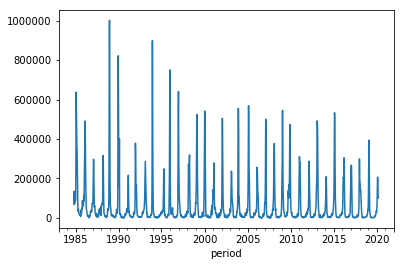

In [7]:
sorted_data['inc'].plot()

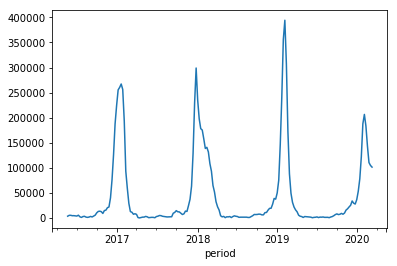

In [8]:
 sorted_data['inc'][-200:].plot()

In [9]:
first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

In [10]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

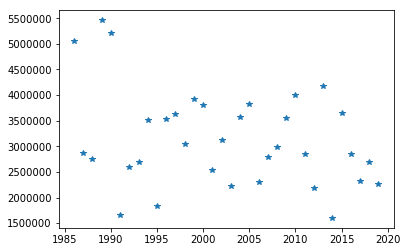

In [11]:
yearly_incidence.plot(style='*')

In [12]:
yearly_incidence.sort_values()

2014    1601698
1991    1663610
1995    1828304
2012    2183912
2003    2234514
2019    2254363
2006    2297262
2017    2322818
2001    2540826
1992    2590314
1993    2699482
2018    2701716
1988    2759663
2007    2786458
2011    2852504
2016    2859019
1987    2867464
2008    2984311
1998    3047298
2002    3115484
1994    3514133
1996    3540251
2009    3558474
2004    3572810
1997    3624129
2015    3647492
2000    3808190
2005    3831409
1999    3914003
2010    3992174
2013    4176872
1986    5050543
1990    5214494
1989    5461328
dtype: int64

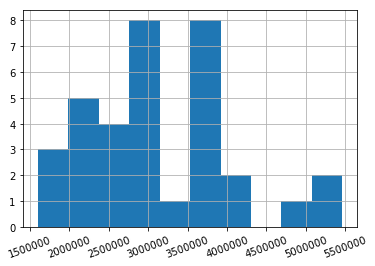

In [13]:
yearly_incidence.hist(xrot=20)